<a href="https://colab.research.google.com/github/cnix17/STAT-7220-Applied-Experimental-Design/blob/main/Assignments/HW1/HW-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 1: Completely Randomized Designs
## Dr. Austin R. Brown
### School of Data Science & Analytics
### Kennesaw State University

**DUE: September 12, 2025**

**INSTRUCTIONS:** You are a quality control analyst for a craft brewery experimenting with a new India Pale Ale (IPA). One key quality attribute of IPA is its bitterness, measured in International Bitterness Units (IBUs). The brewery wants to determine if the aging time (3, 4, or 5 weeks) affects the IBUs of the beer. To test this, the brewing team brews a single batch of the experimental IPA and divides it into aging tanks, with each tank randomly assigned to be aged for 3, 4, or 5 weeks. After aging, the IBUs of ten randomly selected bottles from each aging time are measured using a spectrophotometer. The data are in the file `IPA.xlsx`. With these data, I want you to:

**Question 1.** Briefly define the objective of this experiment

**Question 2.** Specify the outcome variable

**Question 3.** Specify the independent variable. What are some possible lurking variables?

**Question 4.** Briefly explain why a completely randomized design is appropriate for this experiment.

**Question 5.** State the null and alternative hypotheses for this experiment.

**Question 6.** Perform appropriate exploratory analysis, including summary statistics **and** data visualizations. Do the results of these analyses support the null or alternative hypothesis more strongly?

**Question 7.** Build a one-way ANOVA model. Test the assumption of normality using **both** a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?

**Question 8.** Test the assumption of homogeneity of variance using **both** a visual method and a testing method. Do the results of the test(s) support the assumption of homogeneity of variance?

**Question 9.** Report the F-statistic and its associated p-value from the one-way ANOVA model. Which of our two hypotheses is more strongly supported? Why?

**Question 10.** If the data more strongly support the alternative hypothesis, perform Tukey's HSD post-hoc test to determine which aging times are significantly different from each other. If the data more strongly support the null hypothesis, explain why a post-hoc test would not be appropriate.

**Question 11.** Write a brief, contextual conclusion summarizing the results of your analyses.

In [ ]:
#Q1: Briefly define the objective of this experiment
#Answer: Determining whether aging time (3, 4, or 5 weeks) changes the mean IBU of an IPA brewed from a single batch


In [ ]:
#Q2: The outcome variable is International Bitterness Units (IBU) measured on each bottle.

In [ ]:
#Q3: Independent variable: Aging time of the IPA (levels = 3, 4, 5 weeks).
#Possible lurking variables:
#Tank effects: Slight differences in temperature, oxygen exposure, or seal quality between tanks.
#Measurement effects: Spectrophotometer calibration or operator variation.
#Bottle-level variation: differences in fill volume, yeast carryover, or micro-oxidation.
#Environmental conditions: light exposure, vibration, or contamination during storage.


In [ ]:
#Q4: Randomly assigning bottles (or tanks) to aging times spreads unknown influences (tank position, micro-oxygenation, minor handling differences) evenly across groups, protecting validity of inference.

In [ ]:
#Q5: Let μ3, μ4, μ5  be the population mean IBU for aging times 3, 4, 5 weeks
#Null (H₀): μ3=μ4=μ5(no difference in mean IBU across aging times)
#Alternative (H₁): At least one mean differs (not all μ#s are equal)


In [5]:
# === COURSE REPO SETUP === #

# 1. ENTER your GitHub username (the one that owns your fork)
github_username = "cnix17"

# 2. Name of the repo (don't change unless your fork name is different)
repo_name = "STAT-7220-Applied-Experimental-Design"

# 3. Build the full repo URL for cloning
repo_url = f"https://github.com/{github_username}/{repo_name}.git"

import os

# --- Detect if we're already in a repo ---
cwd = os.getcwd()
if cwd.endswith(repo_name):
    print(f"✅ Already inside repo folder: {cwd}")
else:
    # --- If the repo folder exists, check if it's nested ---
    if os.path.exists(repo_name):
        print(f"⚠️ Found existing folder '{repo_name}'. Skipping clone to avoid nesting.")
    else:
        print(f"📥 Cloning repo from {repo_url}...")
        os.system(f"git clone {repo_url}")

    # --- Change to repo directory ---
    if os.path.exists(repo_name):
        os.chdir(repo_name)
        print(f"📂 Changed directory to: {os.getcwd()}")
    else:
        print("❌ ERROR: Repo folder not found. Please check your GitHub username.")

# --- Check if this is the instructor's repo instead of student's fork ---
# This command needs to be run from within the repository directory
remote_url = os.popen("git config --get remote.origin.url").read().strip()

if "abrown9008" in remote_url:
    print("⚠️ WARNING: You are working in the instructor's repo, not your fork!")
    print("💡 Please fork the repo to your own account and update `github_username` above.")
else:
    print(f"🔗 Connected to fork at: {remote_url}")

# Set Today's Directory #

today_dir = "Assignments/HW1"
os.chdir(today_dir)
print(f"📂 Changed directory to: {os.getcwd()}")


📥 Cloning repo from https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git...
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design
🔗 Connected to fork at: https://github.com/cnix17/STAT-7220-Applied-Experimental-Design.git
📂 Changed directory to: /content/STAT-7220-Applied-Experimental-Design/Assignments/HW1


In [6]:
#Q6:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from pathlib import Path
import numpy as np


# Load the dataset
df = pd.read_excel("IPA.xlsx")


In [7]:
# Checking if data is there
df.head()

,Weeks,IBU
0,3 Weeks,51.71
1,3 Weeks,43.53
2,3 Weeks,47.25
3,3 Weeks,41.57
4,3 Weeks,46.27


         count    mean        std    min      25%     50%     75%    max
Weeks                                                                   
3 Weeks   10.0  45.657   5.548563  39.04  42.0600  44.255  47.005  57.75
4 Weeks   10.0  60.164  10.390411  44.56  55.5325  60.940  64.625  81.99
5 Weeks   10.0  71.791  12.627946  48.93  63.0475  71.465  81.100  90.32


<Axes: title={'center': 'IBU'}, xlabel='Weeks'>

<Figure size 640x480 with 0 Axes>

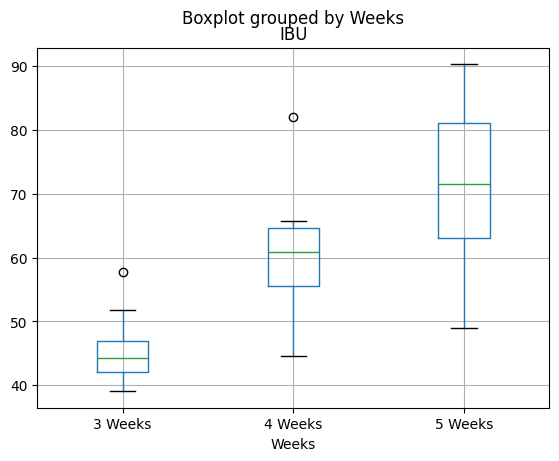

In [10]:
# Summary statistics

summary = df.groupby("Weeks")["IBU"].describe()
print(summary)


 #Boxplot
plt.figure()
df.boxplot(column="IBU", by="Weeks")


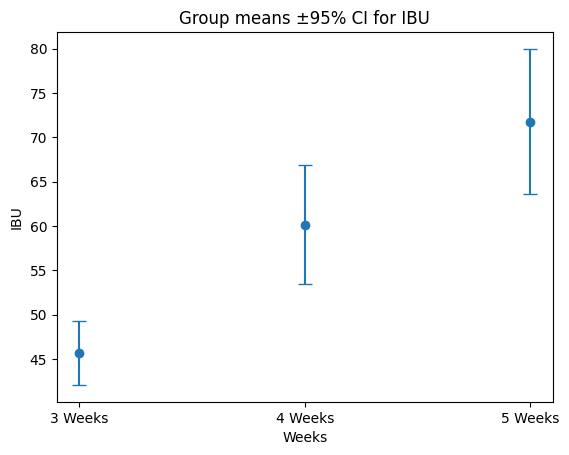

In [11]:
#Q6 Cont:
# Group means with 95% CI
gs = df.groupby("Weeks")["IBU"].agg(["mean","count","std"]).reset_index()
gs["se"] = gs["std"] / np.sqrt(gs["count"])
tcrit = stats.t.ppf(0.975, df.shape[0] - gs.shape[0])
gs["ci"] = tcrit * gs["se"]


plt.figure()
xv = np.arange(len(gs))
plt.errorbar(xv, gs["mean"], yerr=gs["ci"], fmt="o", capsize=5)
plt.xticks(xv, gs["Weeks"].astype(str))
plt.title("Group means ±95% CI for IBU")
plt.xlabel("Weeks")
plt.ylabel("IBU")
plt.show()


              sum_sq    df          F    PR(>F)
C(Weeks)  3428.75378   2.0  17.246546  0.000015
Residual  2683.90994  27.0        NaN       NaN


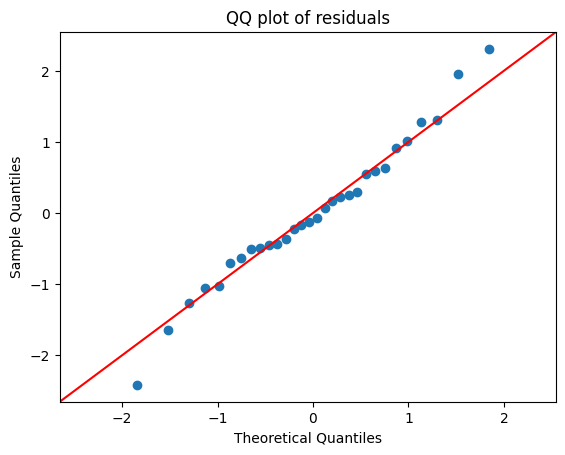

Shapiro-Wilk W=0.9877, p=0.9734


In [12]:
#Question 7. Build a one-way ANOVA model. Test the assumption of normality using both a visual method and a testing method. Do the results of the normality test(s) support the assumption of normality?
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as stats
import matplotlib.pyplot as plt


# One-way ANOVA model
model = smf.ols("IBU ~ C(Weeks)", data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


# Extract residuals
resid = model.resid


# QQ plot
sm.qqplot(resid, line="45", fit=True)
plt.title("QQ plot of residuals")
plt.show()


# Shapiro–Wilk test
sh_stat, sh_p = stats.shapiro(resid)
print(f"Shapiro-Wilk W={sh_stat:.4f}, p={sh_p:.4g}")
